Analysing Setup with Euler method: [■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■]

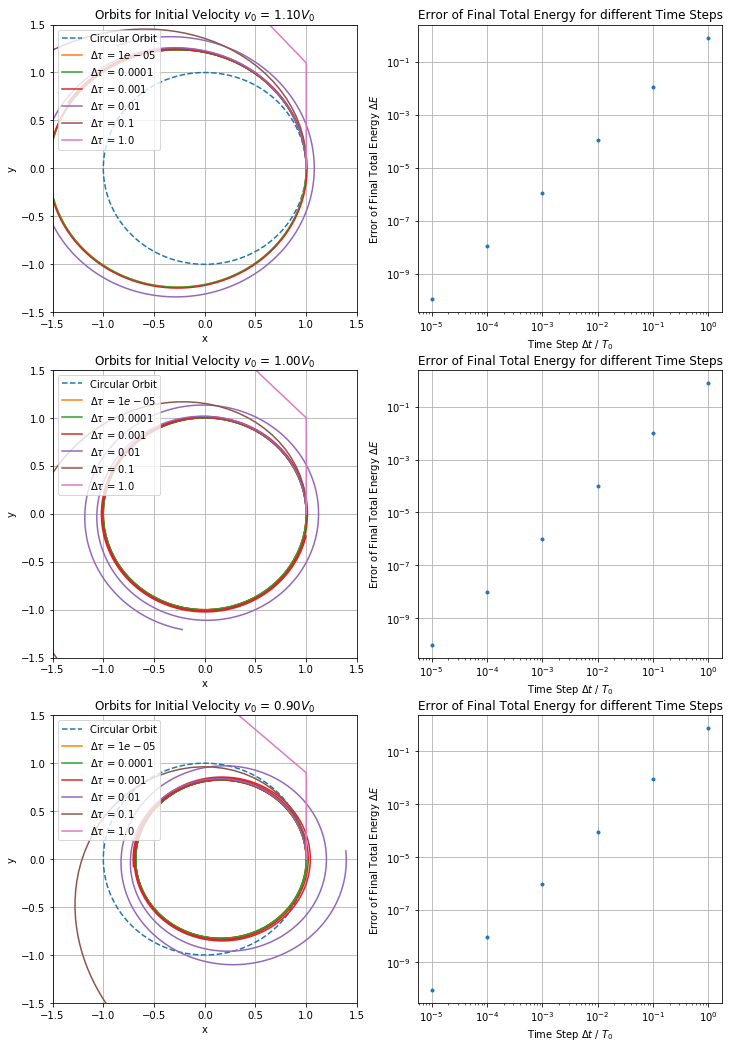

Analysing Setup with Leap-frog method: [■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■]

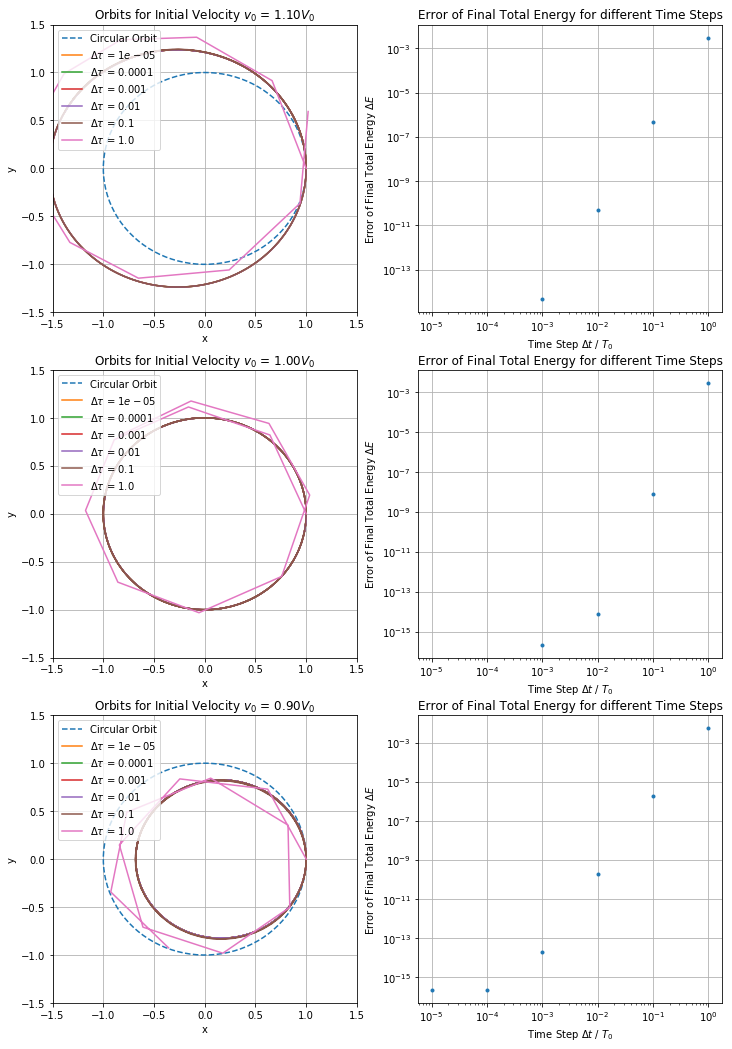

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = 6, 6


def forward_euler(s_0, w_0, tau, dtau):
    n = int(tau / dtau)
    s = np.full((n,3), s_0)
    w = np.full((n,3), w_0)
    for i in range(n-1):
        s[i+1] = s[i] + w[i] * dtau
        w[i+1] = w[i] - s[i] * np.linalg.norm(s[i])**(-3) * dtau
    return s, w

# function integrating with forward euler method


def leap_frog(s_0, w_0, tau, dtau):
    n = int(tau / dtau)
    s = np.full((2*n,3), s_0)
    w = np.full((2*n,3), w_0)
    for i in range(n-1):
        s[2*i+1] = s[2*i]   + w[2*i]   * dtau * 0.5
        w[2*i+2] = w[2*i]   - s[2*i+1] * dtau * np.linalg.norm(s[2*i+1])**(-3) 
        s[2*i+2] = s[2*i+1] + w[2*i+2] * dtau * 0.5
        s[2*i+3] = s[2*i+1] + w[2*i+2] * dtau
    return s[::2], w[::2]

# function integrating with leap-frog method (drift-kick-drift)


def total_energy(s, w):
    return np.linalg.norm(w)**2 / 2 - 1 / np.linalg.norm(s)

# function for computing total energy


def eccentricity(s, w):
    return s * np.dot(w, w) - np.dot(s, w) * w - s / np.linalg.norm(s)

# function for computing eccentricity

   
def simulate_orbit(Norb, dtau, f=1, method=""):
    e_1 = np.array([1, 0, 0])
    e_2 = np.array([0, 1, 0])
    e_3 = np.array([0, 0, 1])
    G = m_1 = m_2 = 1
    M, mu = m_1 + m_2, (m_1 * m_2) / (m_1+ m_2)
    R_0 = 1
    V_0 = (G * M / R_0)**0.5
    T_0 = R_0**3 / G / M
    r_0 = e_1 * R_0
    v_0 = e_2 * V_0 * f
    t_0 = 2*np.pi * T_0 * Norb
    s_0 = r_0 / R_0
    w_0 = v_0 / V_0
    tau = t_0 / T_0
    if method == "Euler":
        s, w = forward_euler(s_0, w_0, tau, dtau)
    if method == "Leap-frog":
        s, w = leap_frog(s_0, w_0, tau, dtau)
    return s, w

# function for computing orbit with given physical parameters


def plot_orbit(s):
    linrange = np.linspace(0, 2*np.pi, 100)
    plt.plot(np.sin(linrange), np.cos(linrange), linestyle="--", label="Circular Norbit")
    plt.plot(s.T[0], s.T[1], label="Forward Euler")
    plt.grid()
    plt.legend()
    plt.show()

# function for plotting a single orbit


def analyse_setup(method=""):
    print(f"Analysing Setup with {method} method: [", end="")
    Norb, magnitude = 2, 4
    dtaus = np.logspace(-magnitude, 0, magnitude+1)
    fs = 1.1, 1, 0.9
    fig, axs = plt.subplots(3,2)
    fig.set_size_inches(12, 18)
    for f in fs:
        i = fs.index(f)
        lim = 1.5
        E_errs = np.zeros(len(dtaus))
        linrange = np.linspace(0, 2*np.pi, 100)
        axs[i][0].set_title(f"Orbits for Initial Velocity $v_0$ = ${f:.2f}V_0$")
        axs[i][0].plot(np.cos(linrange), np.sin(linrange), linestyle="--", label="Circular Orbit")
        for dtau in dtaus:
            print("\u25A0"*2, end="")
            s, w, = simulate_orbit(Norb, dtau, f, method)
            j = np.argwhere(dtaus==dtau)[0][0]
            E_errs[j] = abs(total_energy(s[0], w[0])-total_energy(s[1], w[1]))
            axs[i][0].plot(s.T[0], s.T[1], label=f"$\Delta \\tau $ = ${dtau}$")
            axs[i][0].grid(1)
            axs[i][0].legend(loc="upper left")
            axs[i][0].set_xlim([-lim, lim])
            axs[i][0].set_ylim([-lim, lim])
            axs[i][0].set_xlabel("x")
            axs[i][0].set_ylabel("y")
        axs[i][1].loglog(dtaus, E_errs, marker=".", linestyle="")
        axs[i][1].set_title("Error of Final Total Energy for different Time Steps")
        axs[i][1].set_ylabel("Error of Final Total Energy $\Delta E$")
        axs[i][1].set_xlabel("Time Step $\Delta t$ / $T_0$")
        axs[i][1].grid()
    print("]", end="")
    plt.show()
    
# function for analysing setup of different velocities multitudes f with various time steps 
# dtau and plotting the final total energy's deviation from the initial total energy as a
# function of the time step

analyse_setup("Euler") #task a
analyse_setup("Leap-frog") #task b
# initiate

##  Conclusion
As can be seen, the leap-frog method performs significantly better at every initial velocity and for all time steps compared to the foward euler method. Additionally, one can clearly see that the error of the final total energy increases linearly with the timestep and in case of the euler method also increases with higher initial velocities. However, for the leap-frog method, the error of the final total energy is smaller for initial velocities closer to the velocity for a circular orbit and increases the further the initial deviates from it. This can be sean visually as well: The final position of the orbit is always further away from the circular orbit in case of the euler method, while it either increases or decreases in case of the leap-frog method. This is probably due to the fact that the leap-frog method, with its halfstep iterations constantly corrects the direction for the current position which the euler method can not do due to its synchronized integration.